In [ ]:
1+1

In [1]:
#spark.stop()

In [2]:
import os, sys
import datetime as dt
DEVEL_SRC = os.path.join(os.environ.get('BDA_USER_HOME', ''), "src", "devel")
if DEVEL_SRC not in sys.path:
    sys.path.append(DEVEL_SRC)

USECASES_SRC = os.path.join(DEVEL_SRC, "use-cases") # TODO when - is removed, remove also this line and adapt imports
if USECASES_SRC not in sys.path: 
    sys.path.append(USECASES_SRC)
    
AMDOCS_SRC = os.path.join(DEVEL_SRC, "amdocs_informational_dataset") # TODO when - is removed, remove also this line and adapt imports
if AMDOCS_SRC not in sys.path: 
    sys.path.append(AMDOCS_SRC)
    
import pykhaos.utils.custom_logger as clogger
logging_file = os.path.join(os.environ.get('BDA_USER_HOME', ''), "logging",
                                    "out_" + dt.datetime.now().strftime("%Y%m%d_%H%M%S") + ".log")
logger = clogger.configure_logger(log_filename=logging_file, std_channel=sys.stderr, logger_name="")
logger.info("Logging to file {}".format(logging_file))    
    
    
from project.project_generic import Project


import pykhaos.utils.notebooks as nb

#project_obj = Project("CCC_model_nb", "CCC_model_pykhaos_nb")   

import time
start_time = time.time()
app_name = "CCC_model_nb"

import pykhaos.utils.pyspark_configuration as pyspark_config
sc, spark, sql_context = pyspark_config.get_spark_session(app_name=app_name, log_level="OFF", min_n_executors = 1, max_n_executors = 10, n_cores = 4,
                         executor_memory = "16g", driver_memory="16g")
print("Ended spark session: {} secs | default parallelism={}".format(time.time() - start_time,
                                                                     sc.defaultParallelism))


RUNNING_FROM_NOTEBOOK = nb.isnotebook()
import matplotlib.pyplot as plt
if RUNNING_FROM_NOTEBOOK:
    %load_ext autoreload
    %autoreload 2
    %matplotlib inline  
    EXTERNAL_LIB = os.path.join(os.environ.get('BDA_USER_HOME', ''), "lib", "external_libs")
    if EXTERNAL_LIB not in sys.path:
        sys.path.append(EXTERNAL_LIB)
    %load_ext jupyternotify
    


20181217-215321 [INFO ] Logging to file /var/SP/data/home/csanc109/logging/out_20181217_215321.log


Ended spark session: 35.1370232105 secs | default parallelism=2


<IPython.core.display.Javascript object>

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
from amdocs_informational_dataset.engine.call_centre_calls import CallCentreCalls
from pyspark.sql.functions import collect_set, concat, size, coalesce, col, lpad, struct, count as sql_count, lit, min as sql_min, max as sql_max, collect_list, udf, when
from pyspark.sql.types import StringType, ArrayType, MapType, StructType, StructField, IntegerType
from pyspark.sql.functions import array, regexp_extract
sys.path.append(os.path.join(os.environ.get('BDA_USER_HOME', ''), "src", "devel", "pykhaos", "external_lib"))


In [5]:
import pykhaos.utils.notebooks as nb


# In[2]:

import json
RUNNING_FROM_NOTEBOOK = nb.isnotebook()
default_filename = os.path.join(USECASES_SRC, "churn", "models", "ccc", "input", "ccc_train_test.yaml")

import yaml
input_data = yaml.load(open(default_filename))

UNIVARIATE_ANALYSIS = 'univariate'
TRAIN_MODEL = 'train'
SCORE_NEW_DATA = 'score'
MAJOR_VERSION = '0'
MINOR_VERSION = '003'
phase =  TRAIN_MODEL #  UNIVARIATE_ANALYSIS # this parameters must be read as a program argument.
phase = phase.lower()     

# from pykhaos.modeling.model_info import ModelInfo
# from pykhaos.reporting.reporter import Reporter
# from pykhaos.reporting.type.univariate import Univariate
# from pykhaos.reporting.writter.pdf_writter import PDFWritter
# from pykhaos.reporting.utils.measures import completness
STAGES = 2

In [6]:
# Launch from console 
#/usr/bin/java -ea -verbose:gc -XX:+PrintGCDetails -XX:+PrintGCTimeStamps -cp /var/SP/data/home/csanc109/lib/external_libs/h2o/backend/bin/h2o.jar water.H2OApp -ip 127.0.0.1 -baseport 54323 -ice_root /tmp/tmpMKtqxt -name H2O_from_python_csanc109_5suywz -log_level INFO

# from lib.external_libs import h2o
# h2o.__version__
# h2o.init(ip="127.0.0.1", port=54323, strict_version_check=False)

#######################################
# H2O
#######################################

MODEL_NAME = "ccc_pykhaos"
from pykhaos.modeling.model import Model

from pykhaos.modeling.h2o.h2o_functions import restart_cluster_loop
restart_cluster_loop(port=54127)


Using h2o version 3.18.0.10
('HOLAAAAA', <logging.RootLogger object at 0x7f5811e17790>)
Using h2o version 3.18.0.10
Shutdown 3.18.0.10
init 3.18.0.10
Checking whether there is an H2O instance running at http://localhost:54127. connected.


H2O cluster uptime:,20 mins 02 secs
H2O cluster timezone:,Europe/Rome
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.10
H2O cluster version age:,6 months and 25 days !!!
H2O cluster name:,H2O_from_python_csanc109_99lx4i
H2O cluster total nodes:,1
H2O cluster free memory:,10.01 Gb
H2O cluster total cores:,56
H2O cluster allowed cores:,56
H2O cluster status:,"locked, healthy"


Done!
locked=True healthy=True
Shutdown 3.18.0.10
H2O session _sid_96fc closed.
init 3.18.0.10
Checking whether there is an H2O instance running at http://localhost:54127. connected.


H2O cluster uptime:,21 mins 02 secs
H2O cluster timezone:,Europe/Rome
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.10
H2O cluster version age:,6 months and 25 days !!!
H2O cluster name:,H2O_from_python_csanc109_99lx4i
H2O cluster total nodes:,1
H2O cluster free memory:,10.01 Gb
H2O cluster total cores:,56
H2O cluster allowed cores:,56
H2O cluster status:,"locked, healthy"


Done!
locked=True healthy=True
Shutdown 3.18.0.10
init 3.18.0.10
Checking whether there is an H2O instance running at http://localhost:54127..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.7.0_79"; Java(TM) SE Runtime Environment (build 1.7.0_79-b15); Java HotSpot(TM) 64-Bit Server VM (build 24.79-b02, mixed mode)
  Starting server from /opt/cloudera/parcels/Anaconda-2.5.0/lib/python2.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpZcx4qO
  JVM stdout: /tmp/tmpZcx4qO/h2o_csanc109_started_from_python.out
  JVM stderr: /tmp/tmpZcx4qO/h2o_csanc109_started_from_python.err
  Server is running at http://127.0.0.1:54127
Connecting to H2O server at http://127.0.0.1:54127... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Rome
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.10
H2O cluster version age:,6 months and 25 days !!!
H2O cluster name:,H2O_from_python_csanc109_584m2l
H2O cluster total nodes:,1
H2O cluster free memory:,12.44 Gb
H2O cluster total cores:,56
H2O cluster allowed cores:,56
H2O cluster status:,"accepting new members, healthy"


Done!
locked=False healthy=True
out of while


In [7]:
# v1 df = h2o.import_file("hdfs://vgddp350hr.dc.sedc.internal.vodafone.com/data/udf/vf_es/churn/ccc_model/comercial/df_20180501_20180531_c20180430_n60_comercial_msisdn/1544614716.csv")
# v2 df = h2o.import_file("hdfs://vgddp350hr.dc.sedc.internal.vodafone.com/data/udf/vf_es/churn/ccc_model/comercial/df_20180501_20180531_c20180430_n60_comercial_msisdn/1544755879.csv")
# v3
#df = h2o.import_file("hdfs://vgddp350hr.dc.sedc.internal.vodafone.com/data/udf/vf_es/churn/ccc_model/comercial/df_20180501_20180531_c20180430_n60_comercial_msisdn_OLD/1544818058.csv")


In [8]:
#df_tar = spark.read.option("delimiter", "|").option("header", True).csv('/data/udf/vf_es/churn/ccc_model/comercial/df_20180501_20180531_c20180430_n60_comercial_msisdn_TEST_VIERNES')
#df_tar.select("PRICE_DATA").distinct().show()

In [9]:
%%notify -m "CCC_model_pykahos: ended CCCdata "
#from churn.config_manager.ccc_model_config_mgr import  CCCmodelConfig
#config_obj = CCCmodelConfig('/var/SP/data/home/csanc109/src/devel/use-cases/churn/input/dp_ccc_model.yaml')
print("Starting CCC categories data")
from churn.models.ccc.data.ccc_data import  CCC_Data
data_abs_data_obj = CCC_Data(input_data)
print("Ended CCC_Data")



Starting CCC categories data


/var/SP/data/home/csanc109/src/devel/pykhaos/reporting/utils/plots.py:13: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/opt/cloudera/parcels/Anaconda/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/opt/cloudera/parcels/Anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/opt/cloudera/parcels/Anaconda-2.5.0/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/cloudera/parcels/Anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/cloudera/parcels/Anaconda/lib/python2.7

('!!!!!!!!! pre2post_data', <logging.RootLogger object at 0x7f5811e17790>)
{'campaign_creation': {'campaign_date': 201810,
                       'create_csv_file': True,
                       'storage_format': 'hdfs'},
 'data_preparation': {'agg_by': 'msisdn',
                      'ccc_days': -60,
                      'closing_day': 20180430,
                      'end_port': 20180531,
                      'force_generation': False,
                      'level': 'service',
                      'model_target': 'comercial',
                      'save': 'true,',
                      'segment_filter': 'mobileandfbb',
                      'service_set': 'mobile',
                      'start_port': 20180501},
 'predict': {'dd_prepago': [201808],
             'do_predict': 'true,',
             'use_train_model_predict': True},
 'train': {'do_train': True, 'save_train_results': True, 'train_alg': 0}}
!!!!!!! HARD CODED !!!!!!!!!!
Found /data/udf/vf_es/churn/ccc_model/comercial/df_2

20181217-215603 [INFO ] ***** locked=False healthy=True
20181217-215603 [INFO ] Trying to import '/data/udf/vf_es/churn/ccc_model/comercial/df_20180501_20180531_c20180430_n60_comercial_msisdn_OLD' hdfs=True parquet=False
20181217-215604 [INFO ] Trying to import hdfs://vgddp349hr.dc.sedc.internal.vodafone.com/data/udf/vf_es/churn/ccc_model/comercial/df_20180501_20180531_c20180430_n60_comercial_msisdn_OLD
20181217-215606 [ERROR] file hdfs://vgddp349hr.dc.sedc.internal.vodafone.com/data/udf/vf_es/churn/ccc_model/comercial/df_20180501_20180531_c20180430_n60_comercial_msisdn_OLD could not be found at node 0


HTTP 500 Server Error:
Server error water.api.HDFSIOException:
  Error: HDFS IO Failure: 
 accessed URI : hdfs://vgddp349hr.dc.sedc.internal.vodafone.com/data/udf/vf_es/churn/ccc_model/comercial/df_20180501_20180531_c20180430_n60_comercial_msisdn_OLD
 configuration: Configuration: core-default.xml, core-site.xml, mapred-default.xml, mapred-site.xml, yarn-default.xml, yarn-site.xml, hdfs-default.xml, hdfs-site.xml, /opt/cloudera/parcels/SPARK2/lib/spark2/conf/yarn-conf/core-site.xml
 org.apache.hadoop.ipc.RemoteException(org.apache.hadoop.ipc.StandbyException): Operation category READ is not supported in state standby. Visit https://s.apache.org/sbnn-error
	at org.apache.hadoop.hdfs.server.namenode.ha.StandbyState.checkOperation(StandbyState.java:88)
	at org.apache.hadoop.hdfs.server.namenode.NameNode$NameNodeHAContext.checkOperation(NameNode.java:1835)
	at org.apache.hadoop.hdfs.server.namenode.FSNamesystem.checkOperation(FSNamesystem.java:1515)
	at org.apache.hadoop.hdfs.server.nameno

20181217-215606 [INFO ] Trying to import hdfs://vgddp350hr.dc.sedc.internal.vodafone.com/data/udf/vf_es/churn/ccc_model/comercial/df_20180501_20180531_c20180430_n60_comercial_msisdn_OLD


Parse progress: |█████████████████████████████████████████████████████████| 100%


20181217-215617 [INFO ] file hdfs://vgddp350hr.dc.sedc.internal.vodafone.com/data/udf/vf_es/churn/ccc_model/comercial/df_20180501_20180531_c20180430_n60_comercial_msisdn_OLD found at node 1


file hdfs://vgddp350hr.dc.sedc.internal.vodafone.com/data/udf/vf_es/churn/ccc_model/comercial/df_20180501_20180531_c20180430_n60_comercial_msisdn_OLD found at node 1
Preparing __prepare_ccc_data_for_h2o
Not possible to delete portout_date. Col does not exist
Imputing -1 ... 
Imputing 0 ... 
Imputing unknown ... 
col COMERCIAL does not exist
col NO_COMERCIAL does not exist
col PRECIO does not exist
col TERMINAL does not exist
col CONTENIDOS does not exist
col SERVICIO/ATENCION does not exist
col TECNICO does not exist
col BILLING does not exist
col FRAUD does not exist
col NO_PROB does not exist
col TOTAL_COMERCIAL does not exist
col TOTAL_NO_COMERCIAL does not exist
col fx_tv_fx_first_nif does not exist
col mobile_fx_first_nif does not exist
col tv_fx_first_nif does not exist
col prepaid_fx_first_nif does not exist
col bam_mobile_fx_first_nif does not exist
col fixed_fx_first_nif does not exist
col bam_fx_first_nif does not exist
col fbb_fx_first_nif does not exist


20181217-215948 [INFO ] df_h2o ready to be used!


Ended CCC_Data


<IPython.core.display.Javascript object>

In [10]:
%%notify -m "CCC_model_pykahos: ended fit "
xlsx_report_template_path = os.path.join(USECASES_SRC, "churn", "models", "ccc", 'input', 'xlsx_report_template.yaml')
model_yaml_path = os.path.join(USECASES_SRC, "churn", "models", 'ccc', 'input', 'h2o_automl.yaml')
model_name = MODEL_NAME+'_model'

modeler = Model(model_name, model_yaml_path)
modeler.fit(data_abs_data_obj)


loaded '/var/SP/data/home/csanc109/src/devel/use-cases/churn/models/ccc/input/h2o_automl.yaml'
split h2o
<class 'h2o.frame.H2OFrame'>
<class 'h2o.frame.H2OFrame'>
<churn.models.ccc.data.ccc_data.CCC_Data instance at 0x7f57432a98c0>
H2O Engine :)
Using h2o version 3.18.0.10
**** FIT *****
drf Model Build progress: |███████████████████████████████████████████████| 100%
                                              variable  relative_importance  \
0                                   codigo_postal_city          6333.535645   
1                                         DIR_FACTURA4          5335.057617   
2                                 Order_N1_Description          2753.425781   
3                                           DIR_LINEA3          2674.839844   
4                                 Order_N2_Description          2371.795654   
5                         days_since_first_interaction          1940.940186   
6                                   desc_tariff_simple          1921.583740  

<IPython.core.display.Javascript object>

Asking for key 'model train metrics' in model info dict


Asking for key 'model train metrics' in model info dict


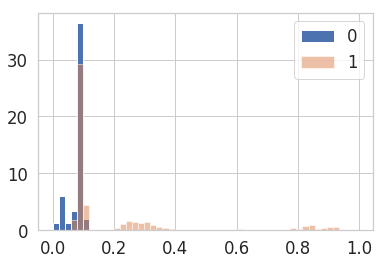

Asking for key 'model test metrics' in model info dict


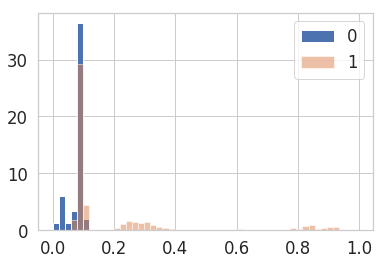

In [27]:


import matplotlib.pyplot as plt
%matplotlib inline  

def show_hist(df):
    _, bins, _ = plt.hist(train[train["label"]==0]["SCORE"], bins=50, range=[0, train["SCORE"].max()], normed=True, label="0")
    _ = plt.hist(train[train["label"]==1]["SCORE"], bins=bins, alpha=0.5, normed=True, label="1")
    plt.legend()
    plt.show()
    
train = modeler.get_model_info().get("model train metrics")["hist_scores"]
show_hist(train)

test = modeler.get_model_info().get("model test metrics")["hist_scores"]
show_hist(test)

In [ ]:
1+2

In [13]:
save_model_path = os.path.join(os.environ.get('BDA_USER_HOME', ''), "data", "churn", "ccc", "results",  '{}_model_2'.format(MODEL_NAME))
modeler.save(save_model_path)


************** model.py save
['numero_variables', 'target_freq', 'model train metrics', 'model test metrics', 'test_partition_size', 'model_fit.config', 'train_partition_size']
Starting save of model at '/var/SP/data/home/csanc109/data/churn/ccc/results/ccc_pykhaos_model_2/ccc_pykhaos_model.pkl'
Saving object at /var/SP/data/home/csanc109/data/churn/ccc/results/ccc_pykhaos_model_2/ccc_pykhaos_model.pkl
Calling to __getstate model
saving_model_info
['numero_variables', 'target_freq', 'model train metrics', 'model test metrics', 'test_partition_size', 'model_fit.config', 'train_partition_size']
 *********** model.py save REMOVEEEEEEEEEE !!!!!!!!
Calling to __getstate H2O Factory
['config', 'params', 'modeler', 'feature_importance']
{'config': {'engine': 'h2o', 'type': 'DRF', 'intro': True, 'params': {'seed': 1234, 'max_runtime_secs': 30, 'balance_classes': True}}, 'params': {'seed': 1234, 'max_runtime_secs': 30, 'balance_classes': True}, 'feature_importance':                             

HOLA
Reporter __init__ model_id=ccc_pykhaos_model model_dir=/var/SP/data/home/csanc109/data/churn/ccc/results/ccc_pykhaos_model_2 template_yaml_path=/var/SP/data/home/csanc109/src/devel/use-cases/churn/models/ccc/input/xlsx_report_template.yaml
Loading model /var/SP/data/home/csanc109/data/churn/ccc/results/ccc_pykhaos_model_2/ccc_pykhaos_model.pkl
Loading object from /var/SP/data/home/csanc109/data/churn/ccc/results/ccc_pykhaos_model_2/ccc_pykhaos_model.pkl
Calling to __setstate H2O Factory
['params', 'config', 'feature_importance']
Calling to __setstate
['model_info', 'model', 'cols']
{'cols': None,
 'model': <pykhaos.modeling.factory.h2o_factory.H2OFactory instance at 0x7f573e293ef0>,
 'model_info': <pykhaos.modeling.model_info.ModelInfo instance at 0x7f573e6df200>}
Loading report template from '/var/SP/data/home/csanc109/src/devel/use-cases/churn/models/ccc/input/xlsx_report_template.yaml'
CREATE
['numero_variables', 'target_freq', 'model train metrics', 'model test metrics', 'test

TypeError: unhashable type: 'dict'

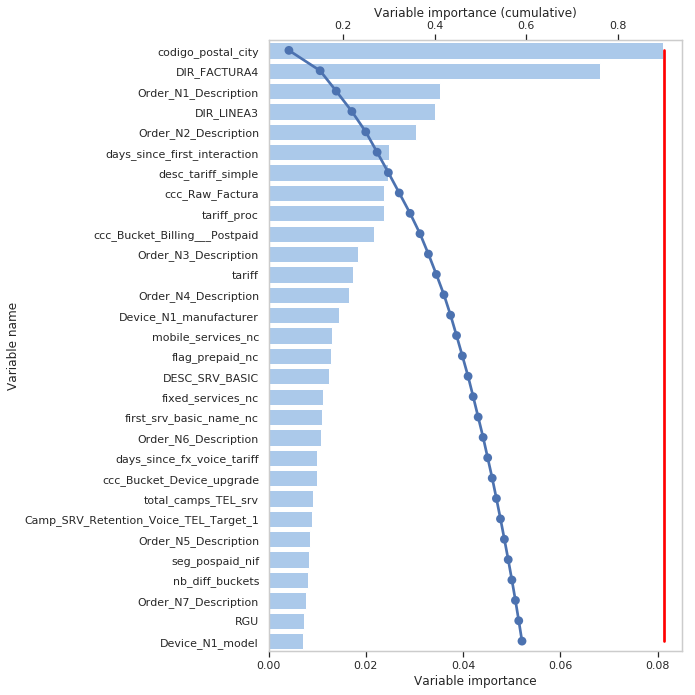

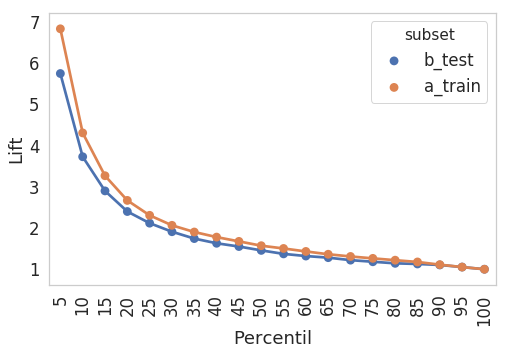

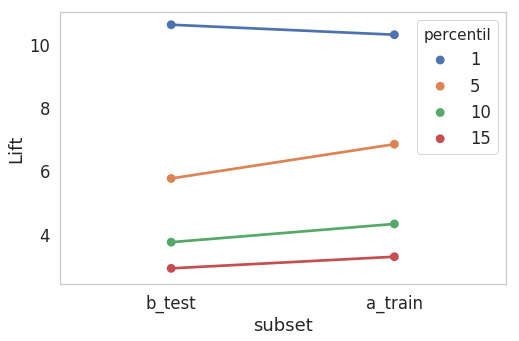

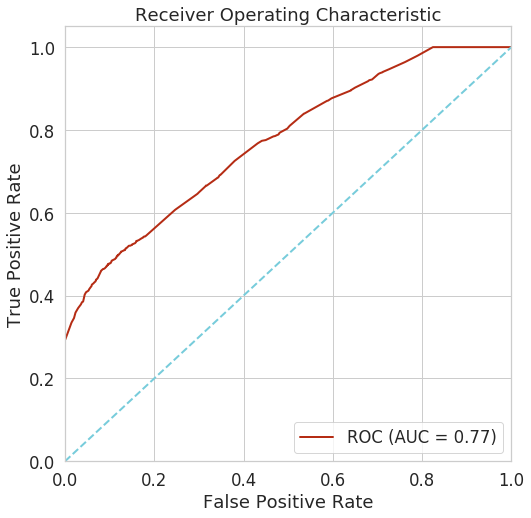

<IPython.core.display.Javascript object>

In [25]:
%%notify -m "CCC_model_pykahos: reporter finished "

from pykhaos.reporting.reporter import Reporter
print("HOLA")

reporter = Reporter(model_name, save_model_path, xlsx_report_template_path).set_saving_path(os.path.join(os.environ.get('BDA_USER_HOME', ''), "data", "churn", "ccc", "results"))
reporter.create()

print 'Informe generado!'